# PERDIDOS EN EL ESPACIO:

En nuestro ejercicios buscamos saber en que planeta nos encontramos en cada una de las dos situaciones, únicamente dejando caer una pelota y conociendo la aceleración de la gravedad.

-A: L=1.00 m y t=0.46 s.

-B: L=2.00 m y t=0.66 s. 

Para ello aplicaremos las formulas para encoontrar los valores experimentales de g, sus errores, y compararemos estos datos.

In [1]:
# importamos las librerias necesarias
import pandas 
import faker 
import random 
import numpy 
import pandas as pd
import faker as fk
import random as rd
import numpy as np

In [2]:
# presentamos los planetas y sus gravedades
grav_values = {
    "Tierra": 9.8,
    "Marte": 3.7,
    "Júpiter": 24.8,
    "Saturno": 9.0,
    "Urano": 8.7,
    "Neptuno": 11.0
}

### APARTADO 1:

Longitud L= 1.00 m y el tiempo t = 0.46 s.

In [3]:
L1 = 1.00                       # longitud 
t1 = 0.46                       # tiempo en caer la pelota
g1 = 2*L1 / (t1**2)             # calculo de la aceleración en este caso

print("La aceleración de la gravedad es: ", g1)

La aceleración de la gravedad es:  9.45179584120983


### APARTADO 2:

Longitud L= 2.00 m y el tiempo t = 0.66 s.

In [4]:
L2 = 2.00                       # longitud 
t2 = 0.66                       # tiempo en caer la pelota
g2 = 2*L1 / (t1**2)             # calculo de la aceleración en este caso

print("La aceleración de la gravedad es: ", g2)

La aceleración de la gravedad es:  9.45179584120983


#### DATAFRAME DE LOS DATOS:

In [5]:
# dataframe de lps datos
df = pd.DataFrame({
    'Longitud': [L1, L2],
    'Tiempo': [t1, t2],
    'Gravedad': [g1, g2],}, index= ['Escenario A', 'Escenario B'])
print(df)

             Longitud  Tiempo  Gravedad
Escenario A       1.0    0.46  9.451796
Escenario B       2.0    0.66  9.451796


## DATASET
... de las variables que proporciona faker para crear 1000 datos experimentales de espacio y tiempo.

In [6]:
from faker import Faker

fake_data = Faker()

def create_sample():
    L_value = round(random.uniform(0.8, 2.5), 2)
    t_value = round(random.uniform(0.4, 0.7), 2)
    calc_grav = round((2 * L_value) / (t_value**2), 2)
    
    grav_diffs = {planet: abs(calc_grav - g) for planet, g in grav_values.items()}
 
    sorted_planets_list = sorted(grav_diffs.keys(), key=lambda x: grav_diffs[x])
    
    top_three_planets = sorted_planets_list[:3]

    return {
        "ID": fake_data.uuid4(),
        "Length (m)": L_value,
        "Time (s)": t_value,
        "Calculated Gravity (m/s²)": calc_grav,
        "Most Likely Planet": top_three_planets[0],
        "Second Most Likely": top_three_planets[1],
        "Third Most Likely": top_three_planets[2]
    }


sample_data = [create_sample() for _ in range(1000)]

csv_filename = "planet_dataset.csv"
df = pd.DataFrame(sample_data)
df.to_csv(csv_filename, index=False)

filepath = "planet_dataset.csv"
data_frame = pd.read_csv(filepath)

data_frame.head(1000)

,ID,Length (m),Time (s),Calculated Gravity (m/s²),Most Likely Planet,Second Most Likely,Third Most Likely
0,6ec68908-1f27-4f7e-8c90-9f41da6a1cd7,1.18,0.60,6.56,Urano,Saturno,Marte
1,407a5042-08f4-4a8c-b185-328e221b1ac7,2.49,0.65,11.79,Neptuno,Tierra,Saturno
2,91697dc6-5bea-4549-998b-3a4aa837e9f2,1.28,0.58,7.61,Urano,Saturno,Tierra
3,395b6b40-63a6-4a68-9224-ae0908ef9d49,0.97,0.51,7.46,Urano,Saturno,Tierra
4,c0e1942b-9c6f-40fb-9d17-ffb75c05e5f7,1.19,0.61,6.40,Urano,Saturno,Marte
...,...,...,...,...,...,...,...
995,8708ce4f-23f6-4dfb-ab9d-1e8dc19d75c7,1.94,0.61,10.43,Neptuno,Tierra,Saturno
996,e3916763-68ba-4611-8358-63eabbb48a65,2.08,0.58,12.37,Neptuno,Tierra,Saturno
997,a165eb23-e490-4c41-9443-cad261c9e849,1.92,0.70,7.84,Urano,Saturno,Tierra
998,bba6a321-1b7d-4136-82c7-c9c2729f878a,1.61,0.44,16.63,Neptuno,Tierra,Saturno


# RESOLUCIÓN DE LOS EJERCICIOS.

### APARTADO 1: ¿Cuánto vale g y su error? ¿En qué planeta están, o pueden estar?

In [7]:
delta_L = 0.01          # error longitud
delta_t = 0.015         # error tiempo


dg_dL1 = 2 / t1**2
dg_dt1 = -4 * L1 / t1**3

delta_g1 = np.sqrt((dg_dL1 * delta_L)**2 + (dg_dt1 * delta_t)**2)

df = pd.DataFrame({'Gravedad medida (g)': [g1],
                   'Error en la medición de g': [delta_g1]})

print(df)

lower_range1 = g1 - delta_g1
upper_range1 = g1 + delta_g1

print(f"Rango de valores posibles para g: {lower_range1:.2f} m/s² a {upper_range1:.2f} m/s²\n")


possible_planets1 = [planet for planet, planet_g in grav_values.items() if lower_range1 <= planet_g <= upper_range1]

print("La tripulación podría estar en los siguientes planetas:")
for planet in possible_planets1:
    print(f"  {planet} (g = {grav_values[planet]} m/s²)")

   Gravedad medida (g)  Error en la medición de g
0             9.451796                   0.623626
Rango de valores posibles para g: 8.83 m/s² a 10.08 m/s²

La tripulación podría estar en los siguientes planetas:
  Tierra (g = 9.8 m/s²)
  Saturno (g = 9.0 m/s²)


Al darnos dos resultados tendremos que hacer un dataset de Saturno y la Tierra.

### APARTADO 2: ¿Cuánto vale g y su error? ¿En qué planeta están, o pueden estar? ¿Con que probabilidad puedes afirmarlo?

In [8]:
delta_L = 0.01          # error longitud
delta_t = 0.015         # error tiempo

dg_dL2 = 2 / t2**2
dg_dt2 = -4 * L2 / t2**3

delta_g2 = np.sqrt((dg_dL2 * delta_L)**2 + (dg_dt2 * delta_t)**2)

df = pd.DataFrame({'Gravedad medida (g)': [g2],
                   'Error en la medición de g': [delta_g2]})

print(df)

lower_range2 = g2 - delta_g2
upper_range2 = g2 + delta_g2

print(f"Rango de valores posibles para g: {lower_range2:.2f} m/s² a {upper_range2:.2f} m/s²\n")


possible_planets2 = [planet for planet, planet_g in grav_values.items() if lower_range2 <= planet_g <= upper_range2]

print("La tripulación podría estar en los siguientes planetas:")
for planet in possible_planets2:
    print(f"  {planet} (g = {grav_values[planet]} m/s²)")

   Gravedad medida (g)  Error en la medición de g
0             9.451796                   0.419915
Rango de valores posibles para g: 9.03 m/s² a 9.87 m/s²

La tripulación podría estar en los siguientes planetas:
  Tierra (g = 9.8 m/s²)


No necesitamos dataset al ser el resultado único: La Tierra.

## Dataset para los dos planetas del apartado A que nos ha dado.

In [9]:
fake = Faker()

planet_g_values = {
    'Tierra': 9.8,
    'Saturno': 9.0
}

def generate_sample():
    L = round(random.uniform(0.8, 2.5), 2)
    t = round(random.uniform(0.4, 0.7), 2)
    g_calculated = round((2 * L) / (t**2), 2)
    
    g_diffs = {planet: abs(g_calculated - g) for planet, g in planet_g_values.items()}
 
    sorted_planets = sorted(g_diffs.keys(), key=lambda x: g_diffs[x])
    
    top_2_planets = sorted_planets[:2]

    return {
        "ID": fake.uuid4(),
        "Longitud (m)": L,
        "Tiempo (s)": t,
        "g_calculado (m/s²)": g_calculated,
        "Planeta más probable": top_2_planets[0],
        "2do más probable": top_2_planets[1]
    }

dataset = [generate_sample() for _ in range(1000)]

csv_filename = "earth_saturn_dataset.csv"
df.to_csv(csv_filename, index=False)

df = pd.DataFrame(dataset)
df.head(1000)

,ID,Longitud (m),Tiempo (s),g_calculado (m/s²),Planeta más probable,2do más probable
0,96566a27-9381-49a5-b18e-bbe5a1fbf2f4,2.10,0.69,8.82,Saturno,Tierra
1,73e877ac-6e38-4145-b65e-f3eec4b4622a,1.57,0.53,11.18,Tierra,Saturno
2,5881986b-5a74-4f65-a4d4-ff01cb8a1bc4,0.91,0.57,5.60,Saturno,Tierra
3,52577515-44f0-4bb9-9c7e-22e74314f160,1.56,0.59,8.96,Saturno,Tierra
4,f104b358-6248-4809-8fcb-e4c5a32d7e59,0.89,0.60,4.94,Saturno,Tierra
...,...,...,...,...,...,...
995,0332afb3-a256-4b1a-be3b-a7c3a9715b73,0.80,0.49,6.66,Saturno,Tierra
996,e66bfb38-7d19-4d84-b09c-c9eeec823473,1.72,0.41,20.46,Tierra,Saturno
997,627a04e3-fbd6-44ba-9679-78047d2e7940,1.20,0.46,11.34,Tierra,Saturno
998,cfa3920b-a1f7-4cbc-b105-c6cdd1d39f3c,1.42,0.50,11.36,Tierra,Saturno


# ANALISIS EDA.
Creamos y mostramos varios gráficos y análisis para entender el dataset anterior:

-> Histograma de Longitud (m)

-> Histograma de Tiempo (s)

-> Histograma de g_calculado (m/s²)

-> Gráfico de dispersión de g_calculado (m/s²) vs Longitud (m)

-> Gráfico de dispersión de g_calculado (m/s²) vs Tiempo (s)

-> Conteo de los planetas más probables

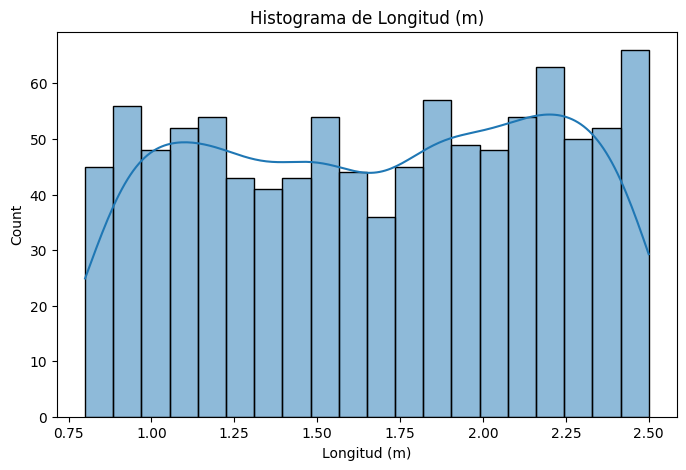

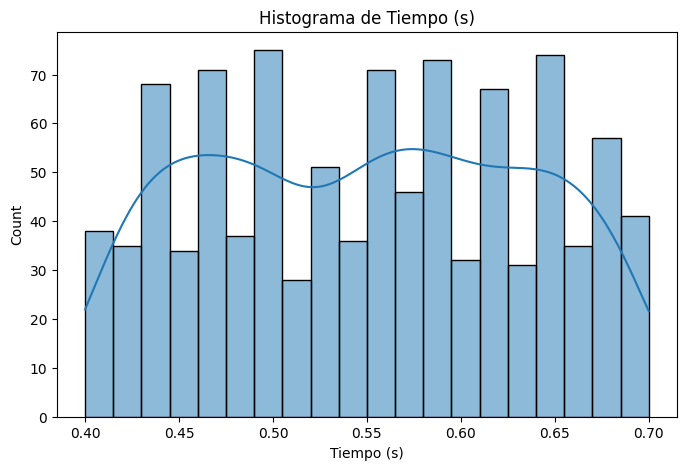

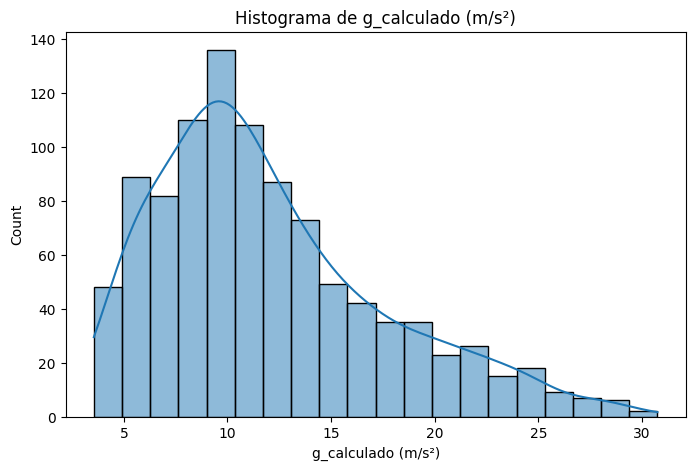

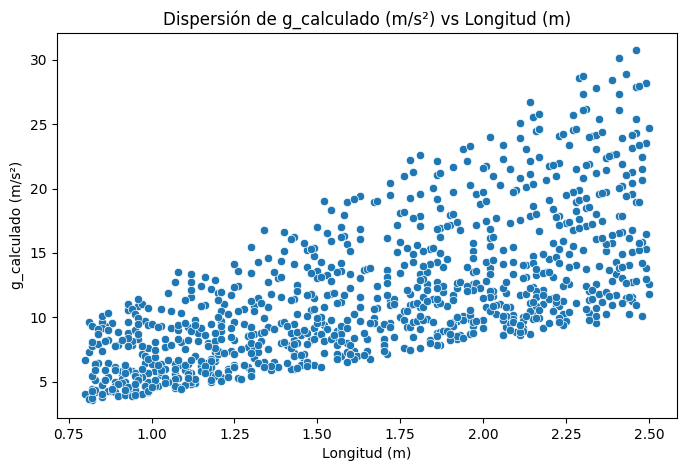

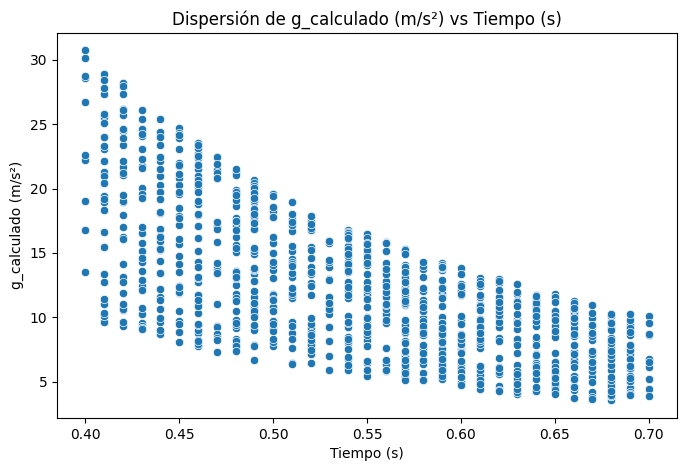

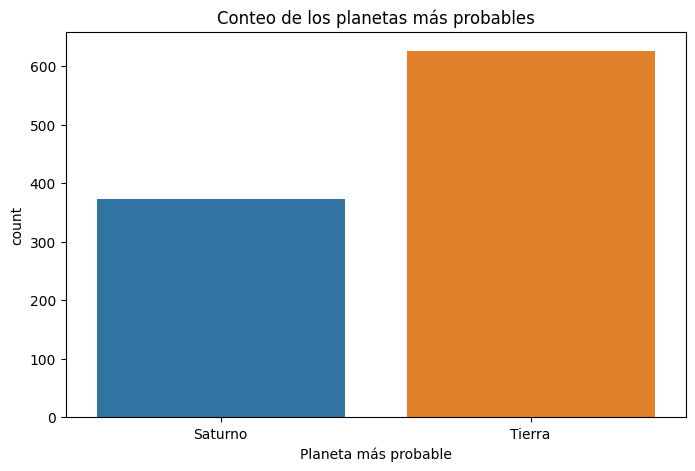

In [11]:
# importamoslas bibliotecas necesarias para ello
import matplotlib.pyplot as plt
import seaborn as sns

# histograma de la longitud (L)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Longitud (m)', bins=20, kde=True)
plt.title("Histograma de Longitud (m)")
plt.show()

# histograma del tiempo (t)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Tiempo (s)', bins=20, kde=True)
plt.title("Histograma de Tiempo (s)")
plt.show()

# histograma de la gravedad calculada (g_calculado)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='g_calculado (m/s²)', bins=20, kde=True)
plt.title("Histograma de g_calculado (m/s²)")
plt.show()

# gráfico de dispersión de la gravedad calculada (g_calculado) vs longitud (L)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Longitud (m)', y='g_calculado (m/s²)')
plt.title("Dispersión de g_calculado (m/s²) vs Longitud (m)")
plt.show()

# gráfico de dispersión de la gravedad calculada (g_calculado) vs tiempo (t)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Tiempo (s)', y='g_calculado (m/s²)')
plt.title("Dispersión de g_calculado (m/s²) vs Tiempo (s)")
plt.show()

# conteo de los planetas más probables
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Planeta más probable')
plt.title("Conteo de los planetas más probables")
plt.show() 